In [1]:
load("../1.Upscaling/upscaling_ba/ba_grid_5.Rdata", verbose = TRUE)

Loading objects:
  ba.mergeGrid5


In [2]:
source("../2.Fire_Seasson/Funciones.r")


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.1 (2021-03-11) is loaded


Get the latest stable version (1.6.3) using <devtools::install_github('SantanderMetGroup/visualizeR')>

Please see 'citation("visualizeR")' to cite this package.



In [3]:
grid = ba.mergeGrid5

In [4]:
##Hacemos la media de todos los eneros, de todos los febreros,... de todos los meses para cada gridBox:
df.seriesTemporales <- func.ToDataFrame(grid = grid, coordX = grid$xyCoords$x, coordY = grid$xyCoords$y, func = mean)


## incluimos las coordenadas en el data frame de series temporales pero creando otro objeto. Esto lo hago para evitar problemas de programación cuando calcule la fire seasson
coordenadas = getCoordsFromDataFrame(df.seriesTemporales)
coord_x = coordenadas$x
coord_y = coordenadas$y
df.seriesTemporales_conCoords <- as.data.frame(cbind(coord_x, coord_y, df.seriesTemporales))

#####Calculamos la Fire SEasson usando las series temporales (las medias de cada mes)
df.fireSeasson <- t(data.frame(t(apply(df.seriesTemporales, 1, func.fireSeasson))))

##Calculamos las bimodales y lo incluimos en el data frame de la fire seasson
bimodales <- data.frame(apply(df.fireSeasson, 1, isBimodal))
df.fireSeasson <- cbind(df.fireSeasson,bimodales)

##Calculamos la Seassonal Concentration y el Seassonal Timing y los incluimos en el data frame de la fire seasson
vector_c <- c()
vector_p <- c()
for (i in 1:nrow(df.seriesTemporales)){
    carFS <- func.caracterizacion_fireSeason(df.seriesTemporales[i,])
    if (carFS[1] != "NofireSeasson"){
        C = carFS$C
        P = carFS$P
        vector_c <- c(vector_c, C)
        vector_p <- c(vector_p, P)
    }else{
        vector_c <- c(vector_c, 0)
        vector_p <- c(vector_p, 0)  
    }
}

df.fireSeasson <- cbind(df.fireSeasson,vector_c)
df.fireSeasson <- cbind(df.fireSeasson,vector_p)

#Cambiamos los nombres para indexar mejor
colnames(df.fireSeasson) <- c('FireSeasson','Bimodal','SeassonalConcentration','SeassonalTiming')

##Incluimos las coordenadas en el data frame de la fire seasson

df.fireSeasson <- cbind(coord_x, coord_y, df.fireSeasson)
rownames(df.fireSeasson) <- NULL

nrow(df.fireSeasson)

[1] 2592

### Fire Season

In [5]:
conFireSeasson = nrow(df.fireSeasson[df.fireSeasson$'FireSeasson' != 'NofireSeasson', ])
sinFireSeasson = nrow(df.fireSeasson[df.fireSeasson$'FireSeasson' == 'NofireSeasson', ])

cat('Total de gridBoxes = ',nrow(df.fireSeasson),
'\nGridboxes sin fire seasson = ',conFireSeasson, '(',conFireSeasson/nrow(df.fireSeasson)*100,'%)',
'\nGridboxes con fire seasson = ',sinFireSeasson, '(',sinFireSeasson/nrow(df.fireSeasson)*100,'%)')

Total de gridBoxes =  2592 
Gridboxes sin fire seasson =  804 ( 31.01852 %) 
Gridboxes con fire seasson =  1788 ( 68.98148 %)

Podemos mostrar, a modo de ejemplo, los gridBoxes que  sí que tienen Fire Seasson

In [6]:
df.fireSeasson[df.fireSeasson$'FireSeasson' != 'NofireSeasson', ][1:10,]

,coord_x,coord_y,FireSeasson,Bimodal,SeassonalConcentration,SeassonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
32,-177.5,67.5,"6, 7",FALSE,0.9573664,1.4244402
67,-172.5,62.5,6,FALSE,1.0000000,-1.0471976
68,-172.5,67.5,"6, 7",FALSE,0.9590392,-1.1315132
101,-167.5,52.5,5,FALSE,1.0000000,-0.5235988
103,-167.5,62.5,5,FALSE,0.9711081,-0.6820426
104,-167.5,67.5,5,FALSE,0.9998596,-1.0466728
138,-162.5,57.5,5,FALSE,0.9463044,-1.0376640
139,-162.5,62.5,"4, 5, 6",FALSE,0.8931201,-1.2417445
140,-162.5,67.5,"5, 6",FALSE,0.9297090,-1.3535124


#### Bimodales

In [7]:
cant_unimodales = nrow(df.fireSeasson[df.fireSeasson$'Bimodal' == FALSE, ])
cant_bimodales = nrow(df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ])

cat('Cantidad de Unimodales = ',cant_unimodales , '(',cant_unimodales/nrow(df.fireSeasson)*100,'%)',
    '\nCantidad de Bimodales',cant_unimodales , '(',cant_bimodales/nrow(df.fireSeasson)*100,'%)')

Cantidad de Unimodales =  2484 ( 95.83333 %) 
Cantidad de Bimodales 2484 ( 4.166667 %)

In [8]:
df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ][1:5,]

,coord_x,coord_y,FireSeasson,Bimodal,SeassonalConcentration,SeassonalTiming
,<dbl>,<dbl>,<named list>,<lgl>,<dbl>,<dbl>
318,-137.5,57.5,"4, 5, 7",TRUE,0.6454944,-1.46422290
388,-127.5,47.5,"4, 6, 7, 8, 9, 10",TRUE,0.8228553,0.04873804
425,-122.5,52.5,"1, 3, 4, 5, 6, 7",TRUE,0.8723380,1.10437434
606,-97.5,57.5,"2, 5, 6, 7",TRUE,0.9278793,1.52961254
630,-92.5,-2.5,"1, 2, 3, 4, 5, 6, 8, 9, 10",TRUE,0.1409138,-1.56805006


Ejemplo de Bimodal

In [9]:
##escogemos la x de una bimodal
x  <- df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ][1,]$'coord_x'
##escogemos la y de la misma bimodal
y  <- df.fireSeasson[df.fireSeasson$'Bimodal' == TRUE, ][1,]$'coord_y'

1        2        3        4        5        6        7        8 
0.000000 0.000000 0.000000 2.195373 1.533276 0.000000 1.022181 5.622010 
       9       10       11       12 
0.000000 0.000000 0.000000 0.000000

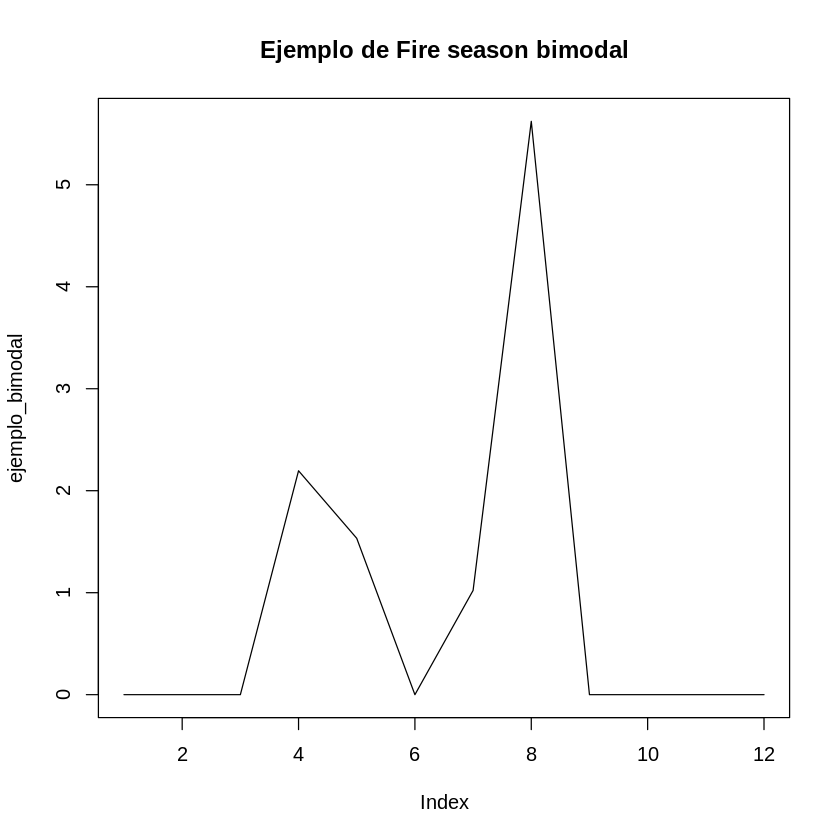

In [10]:
ejemplo_bimodal <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_bimodal <- unlist((ejemplo_bimodal[,3:14]))
ejemplo_bimodal
plot(ejemplo_bimodal,type ='l', main= 'Ejemplo de Fire season bimodal')

### Caracterización global de la fire season

In [11]:
SeassonalConcentration_low <- df.fireSeasson[df.fireSeasson$'SeassonalConcentration' <0.5, ]
SeassonalConcentration_high <- df.fireSeasson[df.fireSeasson$'SeassonalConcentration' >0.5, ]

cat('Cantidad de serires con concentración estacionaria baja (menor que 0) = ',nrow(SeassonalConcentration_low) , '(',nrow(SeassonalConcentration_low)/nrow(df.fireSeasson)*100,'%)',
    '\nCantidad de serires con concentración estacionaria alta (mayor que 0) = ',nrow(SeassonalConcentration_high) , '(',nrow(SeassonalConcentration_high)/nrow(df.fireSeasson)*100,'%)')

Cantidad de serires con concentración estacionaria baja (menor que 0) =  1895 ( 73.10957 %) 
Cantidad de serires con concentración estacionaria alta (mayor que 0) =  697 ( 26.89043 %)

Ejemplo de Seassonal concentration high

In [25]:
##escogemos la x de una bimodal
x  <- SeassonalConcentration_high$'coord_x'[1]
##escogemos la y de la misma bimodal
y  <- SeassonalConcentration_high$'coord_y'[1]

1          2          3          4          5          6          7 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.2555429 70.2751333 
         8          9         10         11         12 
17.3771190  5.1109190  0.0000000  0.0000000  0.0000000

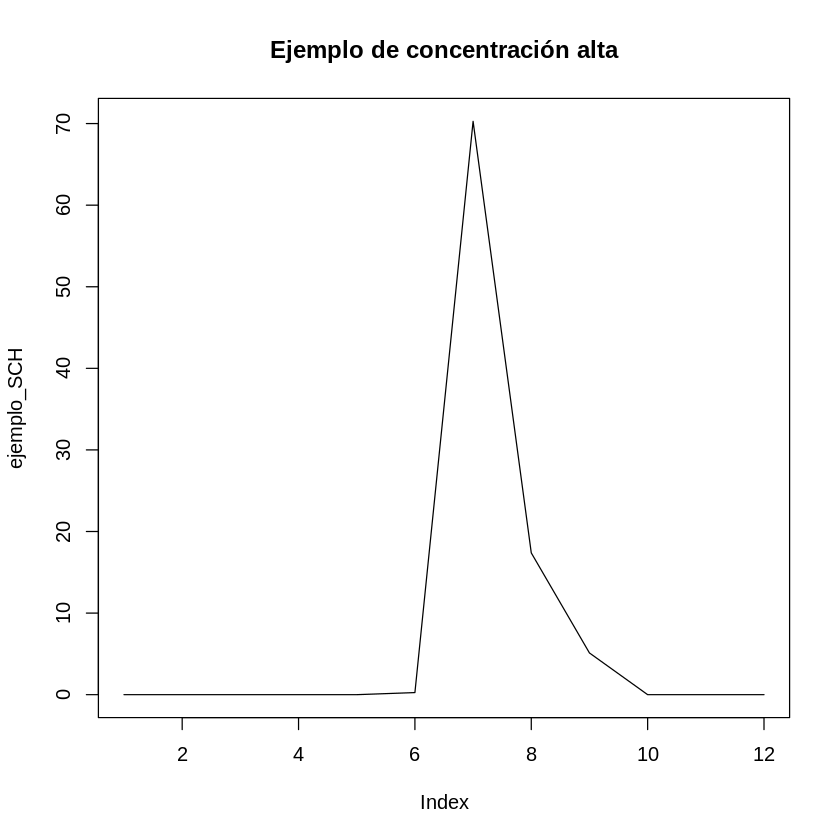

In [26]:
ejemplo_SCH <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCH <- unlist((ejemplo_SCH[,3:14]))
ejemplo_SCH
plot(ejemplo_SCH,type ='l', main= 'Ejemplo de concentración alta')

Ejemplo de Seassona concentration Low

In [27]:
##escogemos la x de una bimodal
x  <- SeassonalConcentration_low$'coord_x'[1]
##escogemos la y de la misma bimodal
y  <- SeassonalConcentration_low$'coord_y'[1]

1  2  3  4  5  6  7  8  9 10 11 12 
 0  0  0  0  0  0  0  0  0  0  0  0

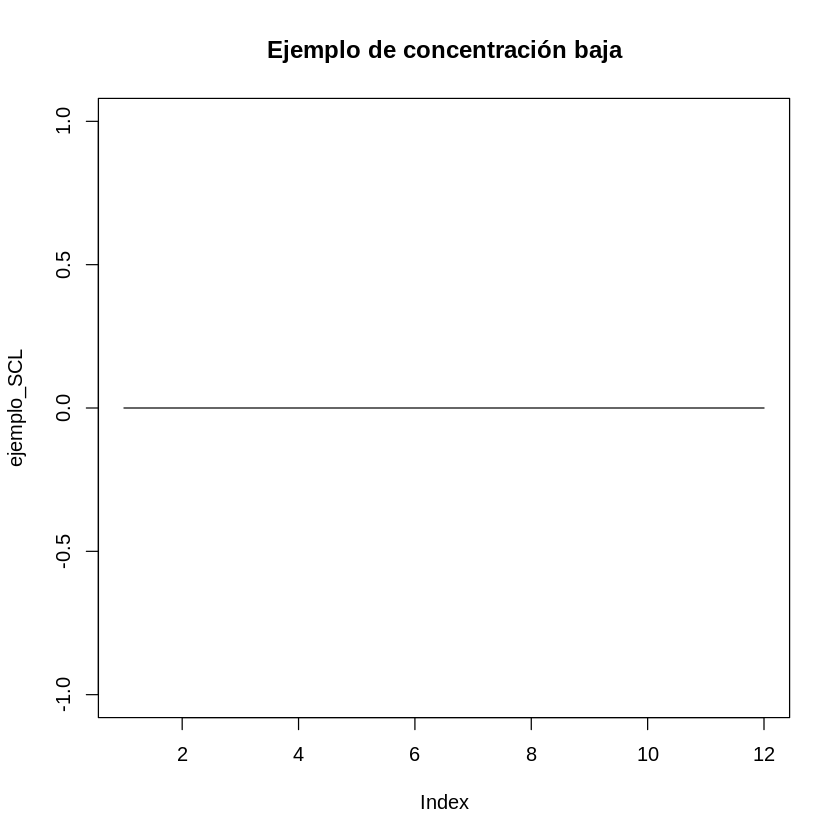

In [29]:
ejemplo_SCL <- df.seriesTemporales_conCoords[df.seriesTemporales_conCoords$'coord_x' == x & df.seriesTemporales_conCoords$'coord_y' == y ,]
ejemplo_SCL <- unlist((ejemplo_SCL[,3:14]))
ejemplo_SCL
plot(ejemplo_SCL,type ='l', main= 'Ejemplo de concentración baja')

## Visualizaciones

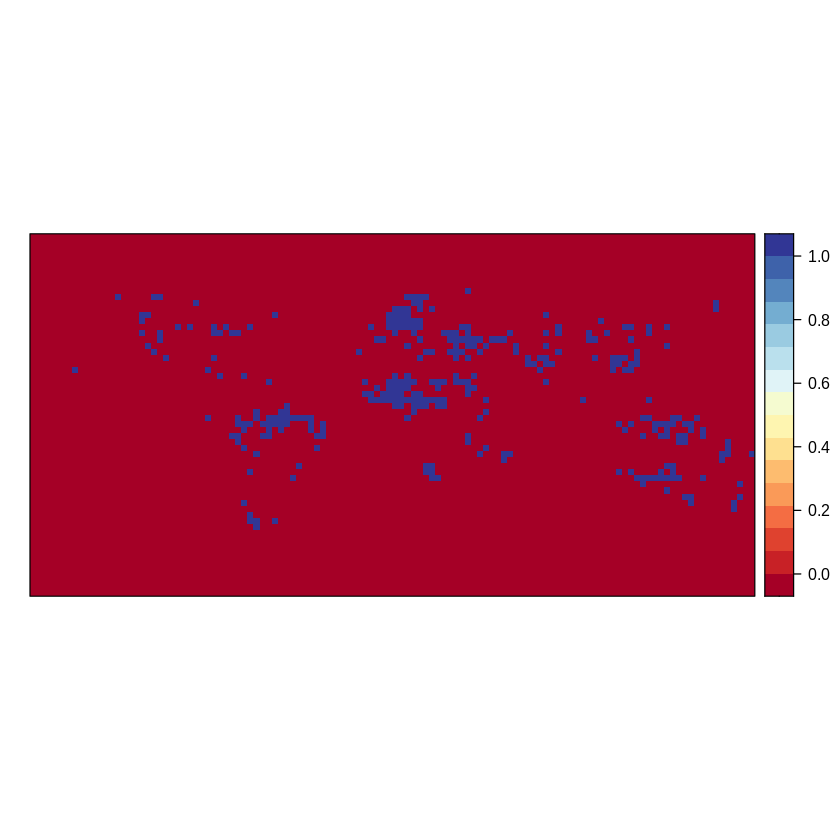

In [11]:
bimodalesOrNot_clim <- quantity2clim(quantity = df.fireSeasson$'Bimodal', what = 'bimodales', ref.grid = grid, backperm = NULL)
spatialPlot(bimodalesOrNot_clim)

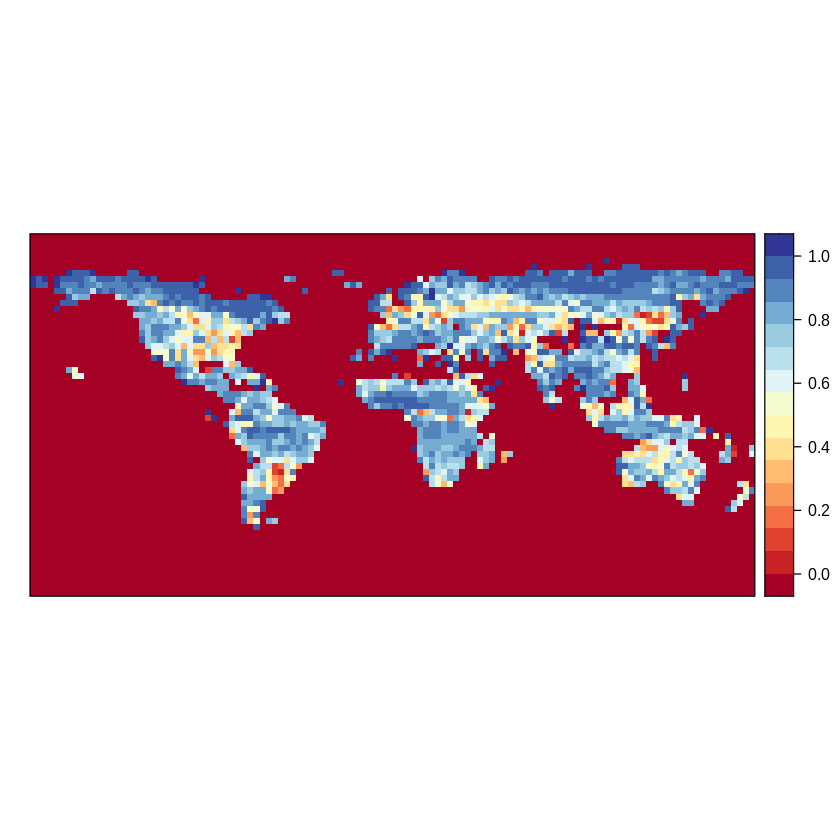

In [12]:
SeassonalConcentration_viz <- quantity2clim(quantity = df.fireSeasson$'SeassonalConcentration', what = 'SeassonalConcentration', ref.grid = grid, backperm = NULL)
spatialPlot(SeassonalConcentration_viz)

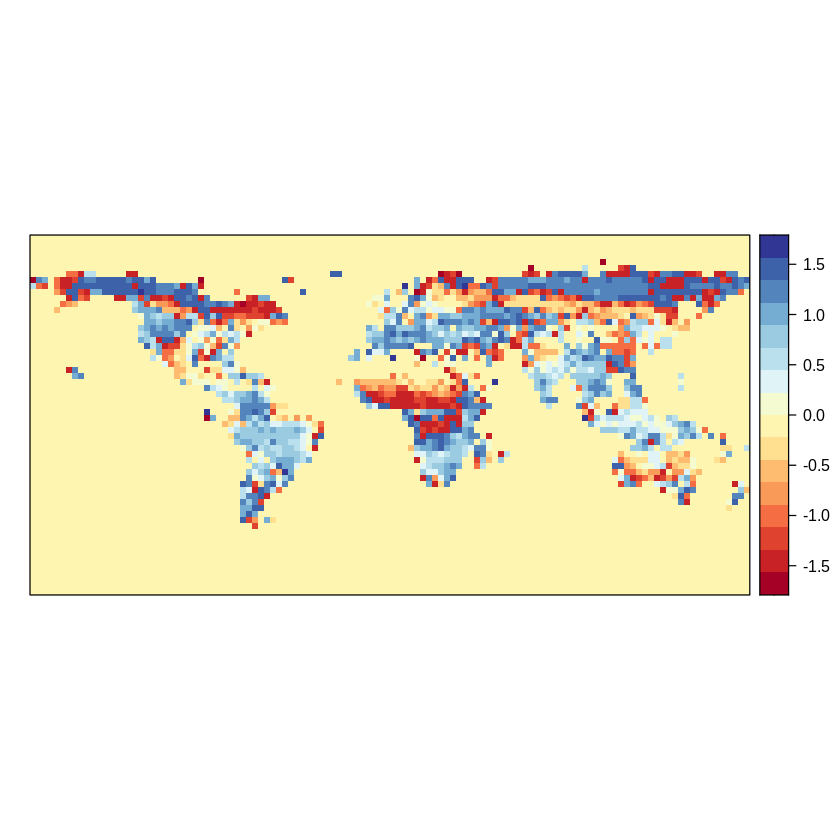

In [13]:
SeassonalConcentration_viz <- quantity2clim(quantity = df.fireSeasson$'SeassonalTiming', what = 'bimodales', ref.grid = grid, backperm = NULL)
spatialPlot(SeassonalConcentration_viz)

In [ ]:
##relacionar series temporales por FBA para normalizar y poder comparar las series temporales

## Area quemada/(FBA * SuperficieDelPixel) => (Area Quemada)/(Area Quemable) para normalizar y comparar series temporales

##Hecho esto podemos plotear si es bimodal o no, la concentración,...etc
#Si tenemos todo con la misma escala vemos la relación entre dos gridbox que están en diferente spuntos de la tierra
#Sabiendo qué gridbox es bidomal, podemos dibujar en un mapa cuáles son bimodales y cuáles no: en el mismo 

#También podemos dibujar en un mapa, as distintas concentraciones(C) y el timing (P) de cada gridboxes

CONVERTIR DE COORDENADAS ESFERICAS A COORDENADAS CARTESIANAS